In [7]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk

In [8]:
with open("maaruf.txt","r") as artikel:
    artikel = artikel.read()

# Remove Punctuation and Special Characters

In [9]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]',' ',artikel)

In [10]:
print("Previous Article")
print("----------------------------------------------------")
print(artikel)
print("----------------------------------------------------")
print("After RE")
print("----------------------------------------------------")
print(my_new_text)

Previous Article
----------------------------------------------------
ï»¿Visi misi kami mengarusutamakan kesetaraan gender. Karena itu kami akan
berusaha semaksimal mungkin agar perempuan tidak hanya bisa di bidang ekonomi, di
bidang politik, tapi juga di bidang pemerintahan. Dalam upaya pemberdayaan ibu-ibu,
selain juga ekonomi tingkat tinggi, tapi juga kami telah melakukan yaitu kredit â€‹umiâ€‹,
usaha mikro, dan juga bank wakaf mikro yang ada di pesantren-pesantren dan saya
tahu persis bahwasanya nasabahnya 100% perempuan. Dan ini adalah upaya
pemberdayaan bahkan sudah beribu-ribu ibu-ibu merasa tertolong dan bahkan mereka
merasa bangga, bukan hanya cita-cita. Oleh karena itu upaya ini akan terus kami
bangun, akan kami kembangkan. Dan juga di desa-desa kami juga akan menciptakan
namanya itu â€‹dewi-dewi dan â€‹dedi-dediâ€‹, â€‹dedi â€‹dewi itu apa namanya â€‹Desa Wisata dan
Desa Digitalâ€‹.

Ya soal zakat dan wakaf ini sebenarnya kita sudah punya lembaganya, lembaga
BAZNAS, BAZLAS d

In [11]:
stop_words = set(stopwords.words('indonesian'))
stop_words_tambahan = ('pak','bapak')
for word in stop_words_tambahan:
    stop_words.add(word)
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text.lower()))

#stopwords removal
filtered_sentence = [w for w in word_tokens if not w in stop_words]

#Lemmatization
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

stop_words 

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

# Create n grams where n is the number of words

In [12]:
from nltk import ngrams
n=2
total_grams=[]
number_of_grams = ngrams(normalized.split(),n)
for grams in number_of_grams:
    total_grams.append(grams)

In [13]:
print(total_grams[:10])

[('visi', 'misi'), ('misi', 'mengarusutamakan'), ('mengarusutamakan', 'kesetaraan'), ('kesetaraan', 'gender'), ('gender', 'berusaha'), ('berusaha', 'semaksimal'), ('semaksimal', 'perempuan'), ('perempuan', 'bidang'), ('bidang', 'ekonomi'), ('ekonomi', 'bidang')]


# Create the wordcloud visualization on the processed data

In [14]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
mask = np.array(Image.open(path.join("maaruf.png")))

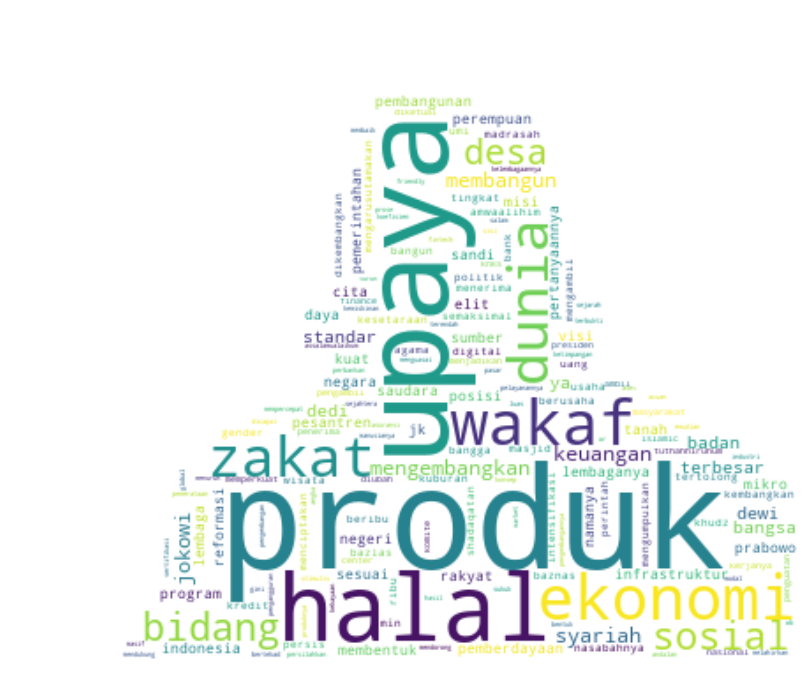

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_font_size=80,max_words=500,mask=mask).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.show()

In [17]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times>3:
        print("%s was found %d times" % (word,times))

bidang was found 5 times
ekonomi was found 7 times
upaya was found 8 times
wakaf was found 7 times
desa was found 4 times
zakat was found 6 times
mengembangkan was found 4 times
keuangan was found 4 times
syariah was found 4 times
dunia was found 6 times
produk was found 12 times
membangun was found 4 times
halal was found 8 times
jokowi was found 4 times
sosial was found 5 times


In [18]:
def get_keywords(text):
    res = keywords(text, ratio =0.05, words=None, split=False, scores=False, pos_filter=('NN','JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
<class 'nltk.text.Text'>
<class 'nltk.text.Text'>


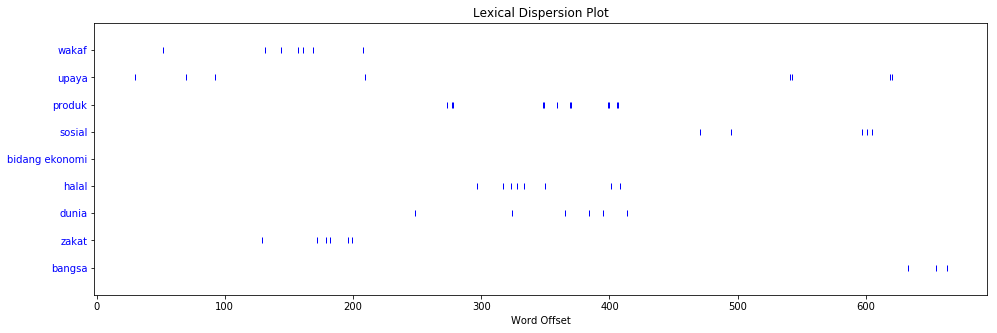

In [19]:
from nltk.book import text1 as content
plt.figure(figsize=(16,5))
topics=get_keywords(normalized.lower())[:15]
print(type(content))
text = nltk.Text(word_tokens)
print(type(text))
text.dispersion_plot(topics)

# Topic Modelling

In [20]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))

In [21]:
import gensim
from gensim import corpora

tokenized_sents = list(sent_to_words(filtered_sentence))

dictionary = corpora.Dictionary(tokenized_sents)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]
#doc_term_matrix

# Creating the object for LDA model & train the model

In [22]:
LDA = gensim.models.ldamodel.LdaModel

#Running and training LDA model on the document term matrix by selecting\
Ldamodel = LDA(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

# Extract two topics with twenty words in each topic

In [23]:
print(Ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.048*"produk" + 0.029*"wakaf" + 0.025*"dunia" + 0.017*"jokowi" + 0.013*"terbesar" + 0.013*"badan" + 0.013*"dedi" + 0.013*"bangsa" + 0.010*"pemberdayaan" + 0.010*"posisi" + 0.010*"pertanyaannya" + 0.010*"elit" + 0.010*"program" + 0.010*"pemerintahan" + 0.010*"reformasi" + 0.010*"cita" + 0.010*"sesuai" + 0.010*"infrastruktur" + 0.010*"negara" + 0.006*"global"'), (1, '0.031*"upaya" + 0.031*"halal" + 0.027*"ekonomi" + 0.023*"zakat" + 0.020*"sosial" + 0.020*"bidang" + 0.016*"mengembangkan" + 0.016*"desa" + 0.016*"keuangan" + 0.016*"syariah" + 0.016*"membangun" + 0.013*"dewi" + 0.013*"ya" + 0.013*"standar" + 0.009*"namanya" + 0.009*"sumber" + 0.009*"saudara" + 0.009*"lembaganya" + 0.009*"indonesia" + 0.009*"pembangunan"')]
